<a href="https://colab.research.google.com/github/RafaelTorresCH/senalesysistemas_/blob/main/PARCIAL_1/PREGUNTA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Parcial 1 - Sistemas y Señales (2025-1)
##**Pregunta 3**
### **Nombre:** Rafael Ricardo Torres Choperena
---


# Resumen Detallado del Cálculo de \(d(x_1,x_2)\)

## Definición de las señales

- Señal continua:  
  $$
  x_1(t) = A \cos(\omega_0\,t),
  \quad
  \omega_0 = \frac{2\pi}{T}.
  $$

- Señal por tramos (onda cuadrada):  
  $$
  x_2(t) =
  \begin{cases}
    +1, & 0 \le t < \tfrac{T}{4},\\[6pt]
    -1, & \tfrac{T}{4} \le t < \tfrac{3T}{4},\\[6pt]
    +1, & \tfrac{3T}{4} \le t < T.
  \end{cases}
  $$
---
## ¿Qué mide la distancia media?

Es el promedio de la **diferencia al cuadrado** entre las dos señales:

$$
d(x_1,x_2)
= \frac{1}{T}\int_{0}^{T} \bigl(x_1(t) - x_2(t)\bigr)^2 \, dt.
$$
---

## Integral por tramos

Como \(x_2\) cambia en tres intervalos, la separamos así:

$$
d = \frac{1}{T}\Bigl[
\int_{0}^{T/4} \bigl(A\cos(\omega_0t) - 1\bigr)^2 dt
\;+\;
\int_{T/4}^{3T/4} \bigl(A\cos(\omega_0t) + 1\bigr)^2 dt
\;+\;
\int_{3T/4}^{T} \bigl(A\cos(\omega_0t) - 1\bigr)^2 dt
\Bigr].
$$
---
## Cálculo de cada aporte

1. **Término en \(\cos^2\):**  
   $$
   \int_{0}^{T} \cos^2(\omega_0t)\,dt = \frac{T}{2}
   \quad\Longrightarrow\quad
   A^2\int_{0}^{T}\cos^2(\omega_0t)\,dt = \frac{A^2\,T}{2}.
   $$

2. **Término constante:**  
   $$
   \int_{0}^{T} 1\,dt = T.
   $$

3. **Término cruzado \(\pm 2A\cos\):**  
   - Tramo 1 \([0,T/4]\):  
     $$
     -2A\int_{0}^{T/4}\cos(\omega_0t)\,dt = -\frac{2A}{\omega_0}.
     $$
   - Tramo 2 \([T/4,3T/4]\):  
     $$
     +2A\int_{T/4}^{3T/4}\cos(\omega_0t)\,dt = -\frac{4A}{\omega_0}.
     $$
   - Tramo 3 \([3T/4,T]\):  
     $$
     -2A\int_{3T/4}^{T}\cos(\omega_0t)\,dt = -\frac{2A}{\omega_0}.
     $$

   Sumando los tres pedazos:
   $$
   -\frac{8A}{\omega_0}
   \quad\Longrightarrow\quad
   -\frac{8A}{\omega_0\,T} \;=\; -\frac{4A}{\pi}.
   $$

## Fórmula final

Reuniendo todo y dividiendo por \(T\):

$$
\boxed{
d(x_1,x_2)
= \frac{A^2}{2}
\;+\;1
\;-\;\frac{4A}{\pi}
}.
$$



Y eso es seria todo


Expresión simbólica simplificada de d(x1, x2):
 2          
A    4⋅A    
── - ─── + 1
2     π     

Valor numérico aproximado de d (A=2, T=1): 0.4535


<ipython-input-1-7edabcdf3c62>:60: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  d_num = np.trapz((x1_num(time) - x2_num(time))**2, time) / T_val


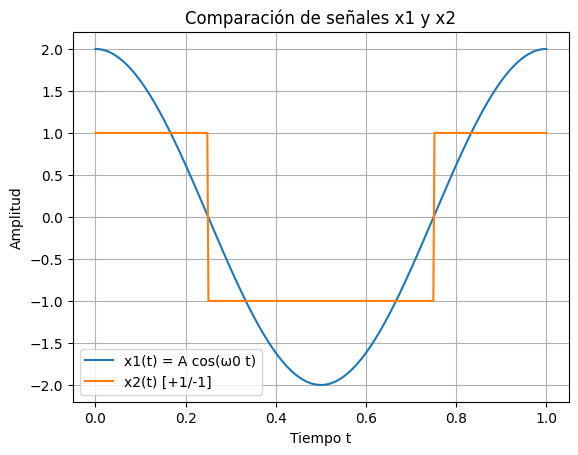

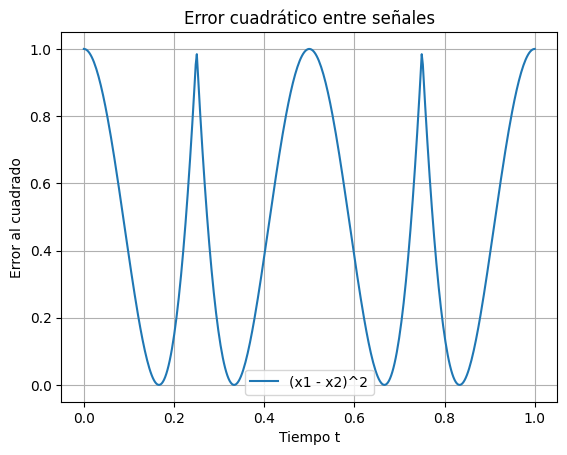

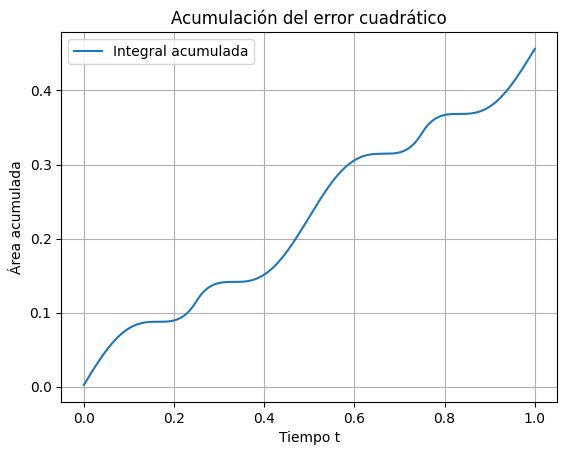

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# Cálculo de la distancia media d(x1, x2) entre dos señales
# - x1: señal continua (cosenoidal)
# - x2: señal por tramos (+1 / -1)
# Usamos Sympy para la parte simbólica y NumPy/Matplotlib para la numérica y gráficas
# -----------------------------------------------------------

# 1) Definimos los símbolos necesarios para Sympy
t, A, T = sp.symbols('t A T', positive=True)
# ω0 es la frecuencia angular para la señal periódica de periodo T
omega0 = 2 * sp.pi / T

# 2) Definimos x1(t) y x2(t) de forma simbólica
#   x1(t) = A * cos(ω0 t)
#   x2(t) cambia de valor: +1 en el primer cuarto, -1 en el medio, +1 en el último cuarto
x1 = A * sp.cos(omega0 * t)
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),         # +1 en [0, T/4)
    (-1, (t >= T/4) & (t < 3*T/4)),    # -1 en [T/4, 3T/4)
    (1, True)                          # +1 en [3T/4, T)
)

# 3) Formamos la expresión del error cuadrático: (x1 - x2)^2
expr = (x1 - x2)**2

# 4) Integramos por tramos para obtener la distancia media simbólica
#    d = (1/T) * [ ∫_0^{T/4} ... + ∫_{T/4}^{3T/4} ... + ∫_{3T/4}^{T} ... ]
d = (1/T) * (
    sp.integrate(expr, (t, 0, T/4)) +
    sp.integrate(expr, (t, T/4, 3*T/4)) +
    sp.integrate(expr, (t, 3*T/4, T))
)
# Simplificamos la expresión resultante
d_simpl = sp.simplify(d)

print("Expresión simbólica simplificada de d(x1, x2):")
sp.pprint(d_simpl)  # Mostramos la fórmula en pantalla

# -----------------------------------
# 5) Parte numérica de prueba
# -----------------------------------
# Elegimos un valor de ejemplo para A y T para ilustrar el cálculo
A_val = 2   # Amplitud de la señal coseno
T_val = 1   # Período normalizado a 1 segundo
omega0_val = 2 * np.pi / T_val

# Creamos funciones numéricas basadas en los valores de ejemplo
x1_num = lambda tt: A_val * np.cos(omega0_val * tt)
x2_num = lambda tt: np.where((tt >= 0) & (tt < 0.25), 1,
                     np.where(tt < 0.75, -1, 1))

# Vector de tiempo uniforme en [0, T]
time = np.linspace(0, T_val, 400)

# 6) Aproximación numérica de d usando la regla del trapecio
d_num = np.trapz((x1_num(time) - x2_num(time))**2, time) / T_val
print(f"\nValor numérico aproximado de d (A={A_val}, T={T_val}): {d_num:.4f}")

# -----------------------------------
# 7) Gráficas explicativas
# -----------------------------------

# Gráfica 1: señal coseno y señal por tramos juntas
plt.figure()
plt.plot(time, x1_num(time), label='x1(t) = A cos(ω0 t)')
plt.plot(time, x2_num(time), label='x2(t) [+1/-1]')
plt.title('Comparación de señales x1 y x2')
plt.xlabel('Tiempo t')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

# Gráfica 2: error cuadrático (x1 - x2)^2
plt.figure()
plt.plot(time, (x1_num(time) - x2_num(time))**2, label='(x1 - x2)^2')
plt.title('Error cuadrático entre señales')
plt.xlabel('Tiempo t')
plt.ylabel('Error al cuadrado')
plt.legend()
plt.grid()
plt.show()

# Gráfica 3: integral acumulada del error
cum_error = np.cumsum((x1_num(time) - x2_num(time))**2) * (time[1] - time[0])
plt.figure()
plt.plot(time, cum_error, label='Integral acumulada')
plt.title('Acumulación del error cuadrático')
plt.xlabel('Tiempo t')
plt.ylabel('Área acumulada')
plt.legend()
plt.grid()
plt.show()

